In [1]:
import astropy.units as u
import numpy as np
from astroduet.filters import load_qe, load_reflectivity, load_redfilter

from astroduet.zodi import load_airglow, load_zodi
from astroduet.config import Telescope


from matplotlib import pyplot as plt
%matplotlib inline
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

# Make duet Telescope instance
duet = Telescope()
zodi = load_zodi(scale=77)


In [2]:
# Version use by Telescope()
from astroduet.filters import filter_parameters
filter_parameters()

({'eff_wave': <Quantity 202.56878682 nm>,
  'eff_width': <Quantity 53.32814342 nm>},
 {'eff_wave': <Quantity 260.20749414 nm>,
  'eff_width': <Quantity 78.11703344 nm>})

Optics reflectivity loader
Input file /Users/bwgref/science/local/git/duet-astro/astroduet/data/al_mgf2_mirror_coatings.csv


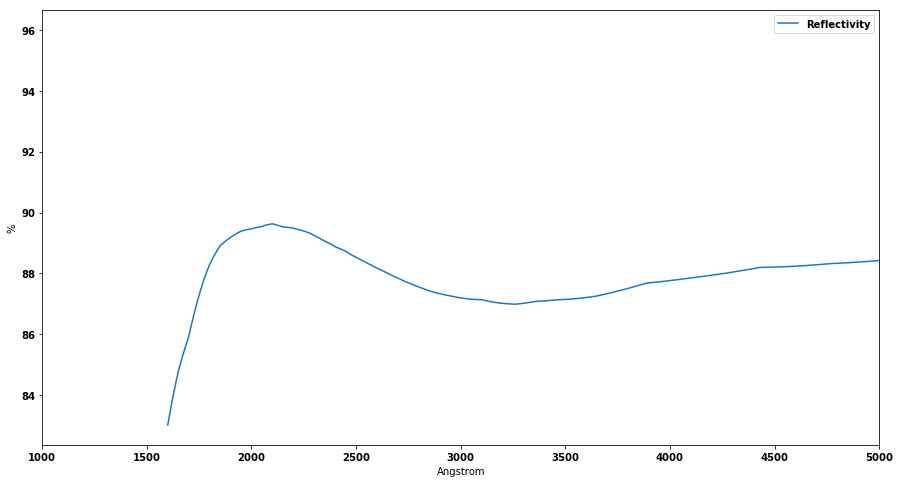

In [3]:
# Reflectivity
ref_wave, reflectivity = load_reflectivity(duet.reflectivity_file['name'], diag=True)

fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()
ax.plot(ref_wave.to(u.AA), reflectivity*100, label='Reflectivity')
ax.set_xlim([1000, 5000])
ax.set_ylabel('%')
ax.legend()
ax.set_xlabel('Angstrom')

plt.show()



Optics reflectivity loader
Input file /Users/bwgref/science/local/git/duet-astro/astroduet/data/al_mgf2_mirror_coatings.csv
Detector Q.E. loader
Band 1 has input file /Users/bwgref/science/local/git/duet-astro/astroduet/data/detector_180_220nm.csv
Red filter loader
Band 1 has input file /Users/bwgref/science/local/git/duet-astro/astroduet/data/duet1_filter_light.csv


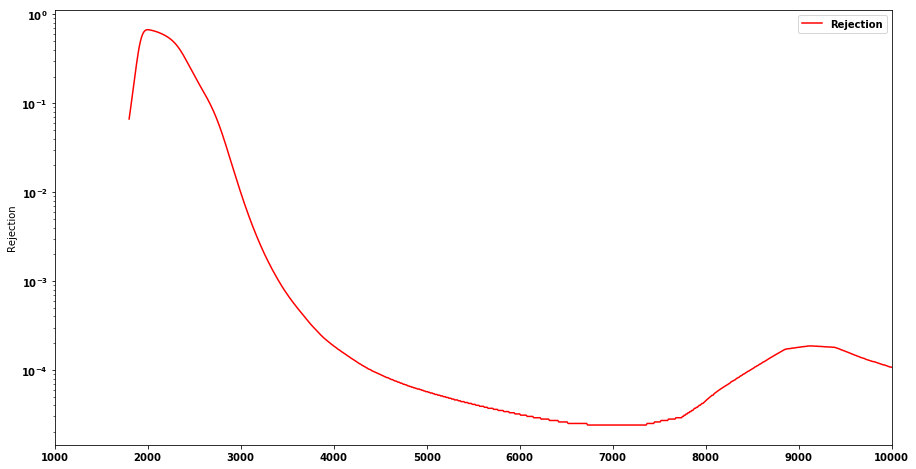

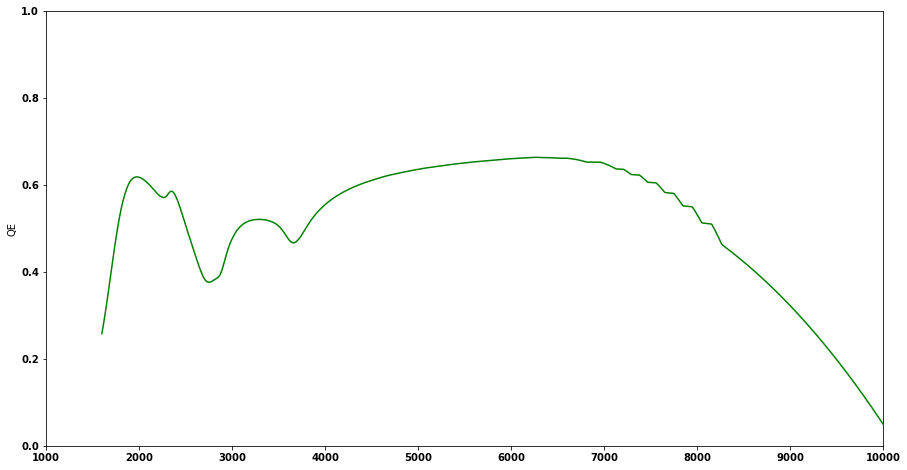

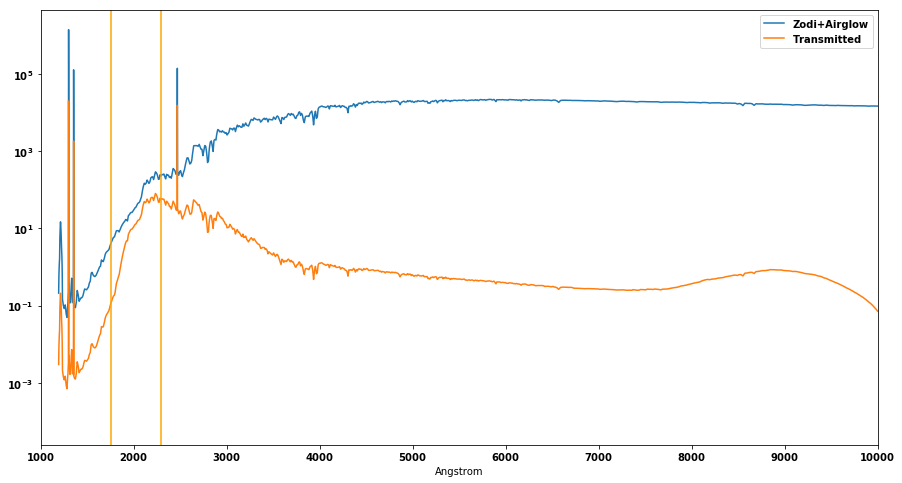

Average in-band transmission: 0.5057328000000001
Average in-band QE: 0.5870176481481482
Ratio of out-of-band to in-band background: 5.245330822382593


In [4]:
# Band 1

band_flux = duet.apply_filters(zodi['wavelength'], zodi['flux'], band=1, diag=True)

low_wave = duet.bandpass1[0]
high_wave = duet.bandpass1[1]

qe_wave, qe = load_qe(duet.qe_files['names'][0])
red_wave, red_trans = load_redfilter(duet.bandpass_files['names'][0])



fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()
ax.set_ylabel('Rejection')
ax.plot(red_wave.to(u.AA), red_trans, color = 'red', label='Rejection')
ax.set_xlim([1000, 10000])
ax.set_yscale('Log')


ax.legend()
fig = plt.figure(figsize = (15, 8))
ax2 = fig.subplots()
ax2.plot(qe_wave.to(u.AA), qe, color = 'green', label="QE")
ax2.set_ylim([0, 1])
ax2.set_xlim([1000, 10000])
ax2.set_ylabel('QE')


fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()
ax.plot(zodi['wavelength'], zodi['flux'], label='Zodi+Airglow')
ax.plot(zodi['wavelength'], band_flux, label='Transmitted')
ax.set_yscale('Log')
ax.set_xlim([1000, 10000])
ax.legend()
ax.set_xlabel('Angstrom')

ax.axvline(low_wave.to(u.AA).value, color ='orange')
ax.axvline(high_wave.to(u.AA).value, color ='orange')
plt.show()



in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
in_band_qe = qe[(qe_wave > low_wave) & (qe_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))
print('Average in-band QE: {}'.format(in_band_qe))


in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()
out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
print('Ratio of out-of-band to in-band background: {}'.format(out_of_band / in_band))



Optics reflectivity loader
Input file /Users/bwgref/science/local/git/duet-astro/astroduet/data/al_mgf2_mirror_coatings.csv
Detector Q.E. loader
Band 1 has input file /Users/bwgref/science/local/git/duet-astro/astroduet/data/detector_180_220nm.csv
Red filter loader
Band 1 has input file /Users/bwgref/science/local/git/duet-astro/astroduet/data/duet2_filter_light.csv


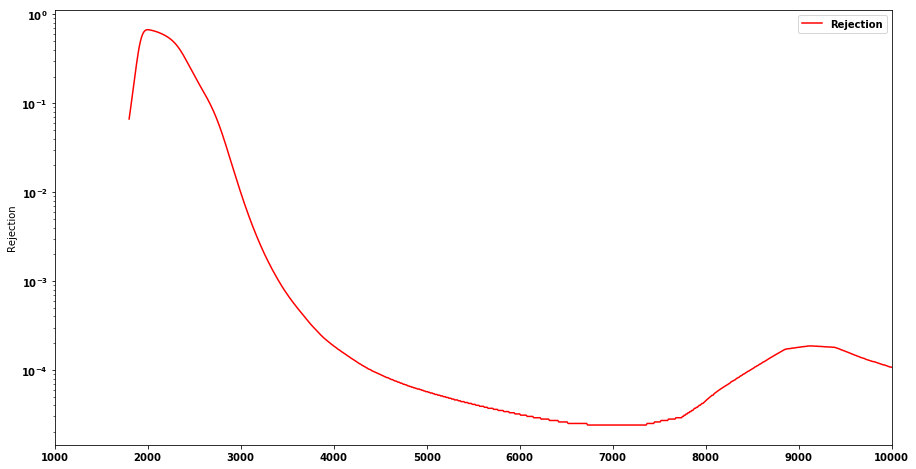

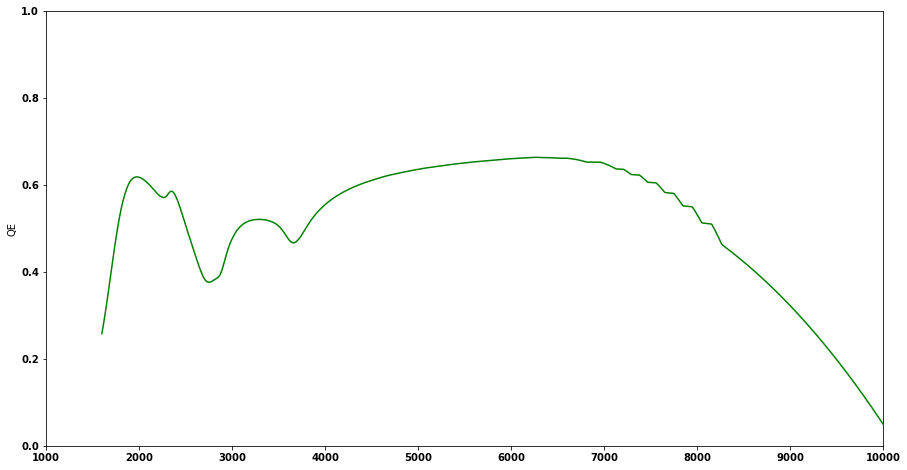

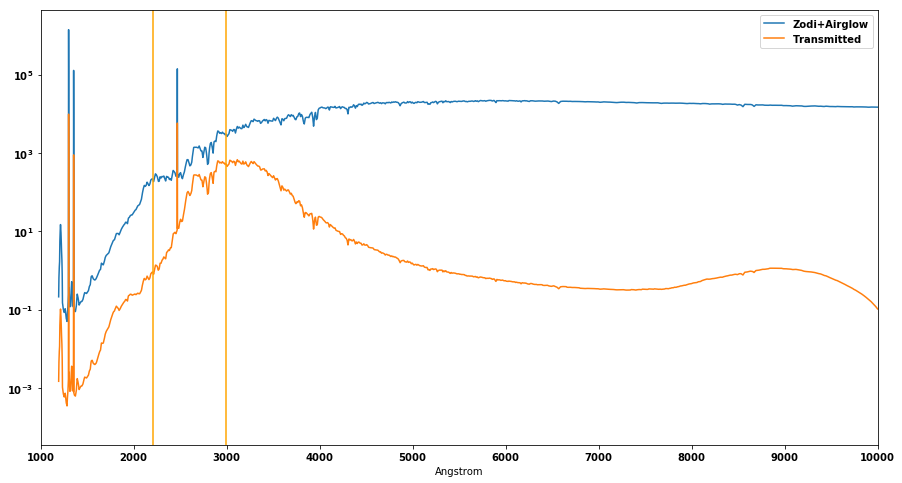

Average in-band transmission: 0.1897491282051282
Average in-band QE: 0.4723864487179487
Ratio of out-of-band to in-band background: 2.312619999578268


In [5]:
# Band 2

band_flux = duet.apply_filters(zodi['wavelength'], zodi['flux'], band=2, diag=True)

low_wave = duet.bandpass2[0]
high_wave = duet.bandpass2[1]

qe_wave, qe = load_qe(duet.qe_files['names'][0])
red_wave, red_trans = load_redfilter(duet.bandpass_files['names'][0])



fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()
ax.set_ylabel('Rejection')
ax.plot(red_wave.to(u.AA), red_trans, color = 'red', label='Rejection')
ax.set_xlim([1000, 10000])
ax.set_yscale('Log')


ax.legend()
fig = plt.figure(figsize = (15, 8))
ax2 = fig.subplots()
ax2.plot(qe_wave.to(u.AA), qe, color = 'green', label="QE")
ax2.set_ylim([0, 1])
ax2.set_xlim([1000, 10000])
ax2.set_ylabel('QE')


fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()
ax.plot(zodi['wavelength'], zodi['flux'], label='Zodi+Airglow')
ax.plot(zodi['wavelength'], band_flux, label='Transmitted')
ax.set_yscale('Log')
ax.set_xlim([1000, 10000])
ax.legend()
ax.set_xlabel('Angstrom')

ax.axvline(low_wave.to(u.AA).value, color ='orange')
ax.axvline(high_wave.to(u.AA).value, color ='orange')
plt.show()



in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
in_band_qe = qe[(qe_wave > low_wave) & (qe_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))
print('Average in-band QE: {}'.format(in_band_qe))


in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()
out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
print('Ratio of out-of-band to in-band background: {}'.format(out_of_band / in_band))




Band1: 220.31 nm λ_eff, 53.33 nm W_eff
Band2: 291.08 nm λ_eff, 78.12 nm W_eff


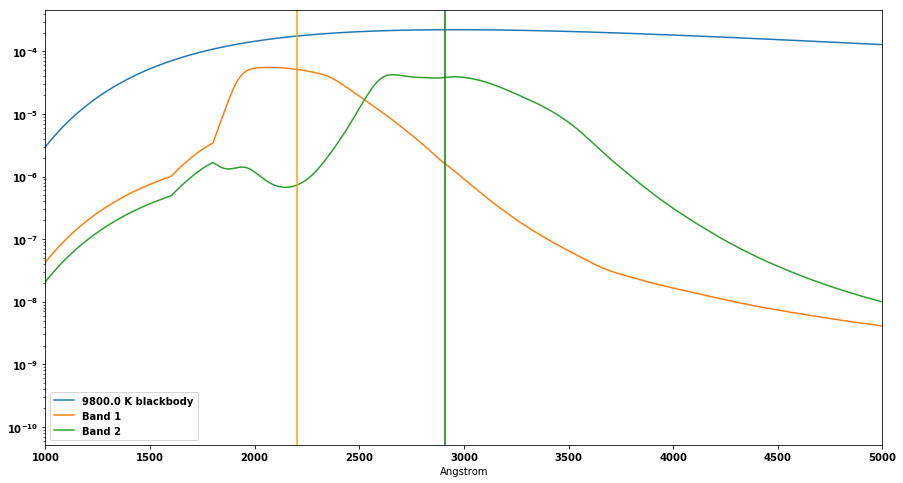

In [6]:
# Use T=9.8e3 K (Vega) to compute "effective lambda":

from astropy.modeling import models
from astropy.modeling.blackbody import FLAM

temp = 9.8e3*u.K
bb = models.BlackBody1D(temperature=temp)
wave = np.arange(1000, 10000)*u.AA
flux = bb(wave).to(FLAM, u.spectral_density(wave))

band1 = duet.apply_filters(wave, flux, band=1)
band2 = duet.apply_filters(wave, flux, band=2)

fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()
ax.plot(wave, flux, label='{} blackbody'.format(temp))
ax.plot(wave, band1, label='Band 1')
ax.plot(wave, band2, label='Band 2')
ax.set_yscale('Log')
ax.set_xlim([1000, 5000])
ax.legend()
ax.set_xlabel('Angstrom')


λ_eff1 = ((band1*wave).sum() / (band1.sum())).to(u.nm)
λ_eff2 = ((band2*wave).sum() / (band2.sum())).to(u.nm)

ax.axvline(λ_eff1.to(u.AA).value, color ='orange')
ax.axvline(λ_eff2.to(u.AA).value, color = 'green')

dλ = wave[1] - wave[0]
t1 = band1 / flux
t2 = band2 / flux

w1 = (dλ * t1.sum() / t1.max()).to(u.nm)
w2 = (dλ * t2.sum() / t2.max()).to(u.nm)

print('Band1: {0:0.2f} λ_eff, {1:0.2f} W_eff'.format(λ_eff1, w1))
print('Band2: {0:0.2f} λ_eff, {1:0.2f} W_eff'.format(λ_eff2, w2))


plt.show()




Band1: 208.96 nm λ_eff, 53.33 nm W_eff
Band2: 270.84 nm λ_eff, 78.12 nm W_eff


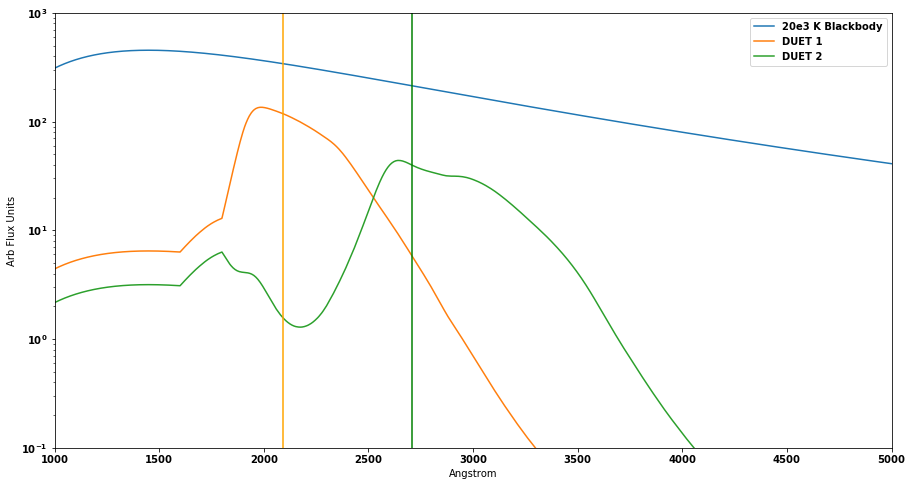

In [7]:
# Use T=20e3 K to compute "effective lambda":

from astropy.modeling import models
from astropy.modeling.blackbody import FLAM

temp = 20e3*u.K
bb = models.BlackBody1D(temperature=temp)
wave = np.arange(1000, 10000)*u.AA
flux = bb(wave).to(FLAM, u.spectral_density(wave))

band1 = duet.apply_filters(wave, flux, band=1)
band2 = duet.apply_filters(wave, flux, band=2)


fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()
ax.plot(wave, flux*1e6, label='20e3 K Blackbody'.format(temp))
ax.plot(wave, band1*1e6, label='DUET 1')
ax.plot(wave, band2*1e6, label='DUET 2')
ax.set_yscale('Log')
ax.set_xlim([1000, 5000])
ax.set_ylim([1e-1, 1e3])
ax.legend()
ax.set_xlabel('Angstrom')
ax.set_ylabel('Arb Flux Units')

λ_eff1 = ((band1*wave).sum() / (band1.sum())).to(u.nm)
λ_eff2 = ((band2*wave).sum() / (band2.sum())).to(u.nm)

ax.axvline(λ_eff1.to(u.AA).value, color ='orange')
ax.axvline(λ_eff2.to(u.AA).value, color = 'green')

dλ = wave[1] - wave[0]
t1 = band1 / flux
t2 = band2 / flux

w1 = (dλ * t1.sum() / t1.max()).to(u.nm)
w2 = (dλ * t2.sum() / t2.max()).to(u.nm)

print('Band1: {0:0.2f} λ_eff, {1:0.2f} W_eff'.format(λ_eff1, w1))
print('Band2: {0:0.2f} λ_eff, {1:0.2f} W_eff'.format(λ_eff2, w2))



plt.show()

Band1: 202.57 nm λ_eff, 53.33 nm W_eff
Band2: 260.21 nm λ_eff, 78.12 nm W_eff


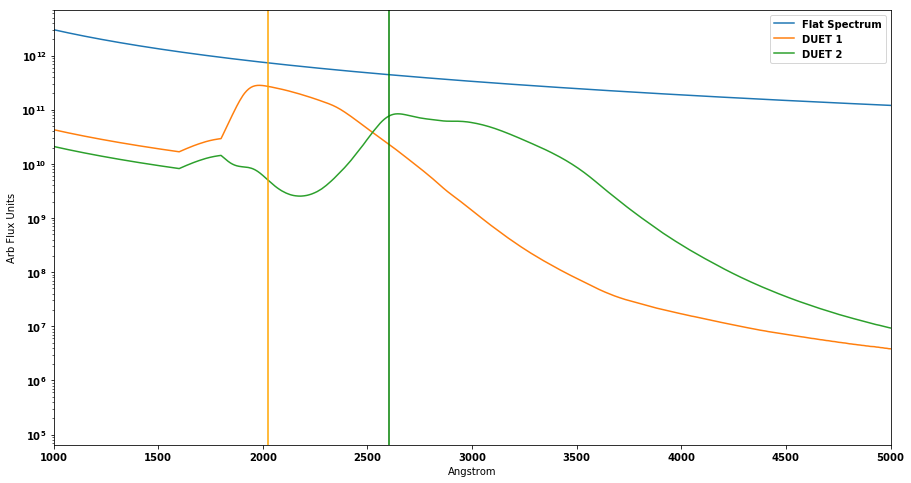

In [8]:
# AB mag version

from astropy.modeling.blackbody import FNU

flat_model =  np.zeros_like(wave.value)
flat_model += 1
flat_model *= FNU
flux = flat_model.to(FLAM, u.spectral_density(wave))

band1 = duet.apply_filters(wave, flux, band=1)
band2 = duet.apply_filters(wave, flux, band=2)
fig = plt.figure(figsize = (15, 8))
ax = fig.subplots()

ax.plot(wave, flux, label='Flat Spectrum'.format(temp))
ax.plot(wave, band1, label='DUET 1')
ax.plot(wave, band2, label='DUET 2')

ax.set_yscale('Log')
ax.set_xlim([1000, 5000])
#ax.set_ylim([1e-4, 2])


ax.legend()
ax.set_xlabel('Angstrom')
ax.set_ylabel('Arb Flux Units')



λ_eff1 = ((band1*wave).sum() / (band1.sum())).to(u.nm)
λ_eff2 = ((band2*wave).sum() / (band2.sum())).to(u.nm)

ax.axvline(λ_eff1.to(u.AA).value, color ='orange')
ax.axvline(λ_eff2.to(u.AA).value, color = 'green')

dλ = wave[1] - wave[0]
t1 = band1 / flux
t2 = band2 / flux

w1 = (dλ * t1.sum() / t1.max()).to(u.nm)
w2 = (dλ * t2.sum() / t2.max()).to(u.nm)

print('Band1: {0:0.2f} λ_eff, {1:0.2f} W_eff'.format(λ_eff1, w1))
print('Band2: {0:0.2f} λ_eff, {1:0.2f} W_eff'.format(λ_eff2, w2))



plt.show()